Importing needed Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import openpyxl

In [21]:
%pprint

Pretty printing has been turned ON


Reading the data

In [10]:
from config import csv_path

df = pd.read_csv(csv_path)

Displaying the first 5 rows of df.

As we can see there is a total of 31 columns. 

Time, Amount and Class columns are the only one which where not transformed in the PCA process. All remaining variables where transformed with PCA and are labelled from V1 to V28

In [11]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Displaying the class distribution (with 0:Genuine, 1:Fraudulent transaction) in absolute number. As one can see very easily there is a massive imbalance between the number of transactions between both classes.

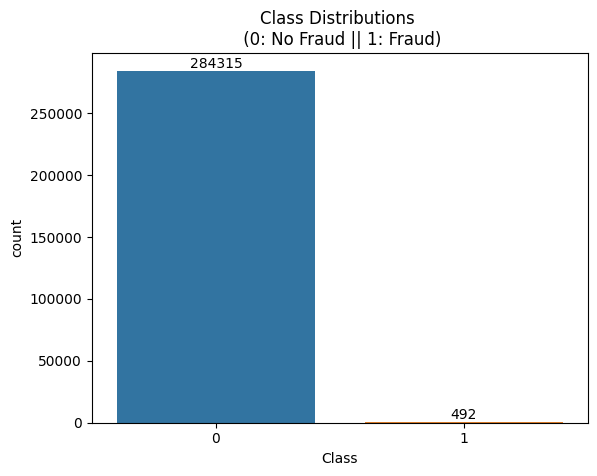

In [12]:
fig, ax = plt.subplots()
colors = ["#0101DF", "#DF0101"]
sns.countplot(data = df, x='Class',ax=ax)
ax.bar_label(ax.containers[0])
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=12)
plt.show()

Now showing the imbalance in relative values

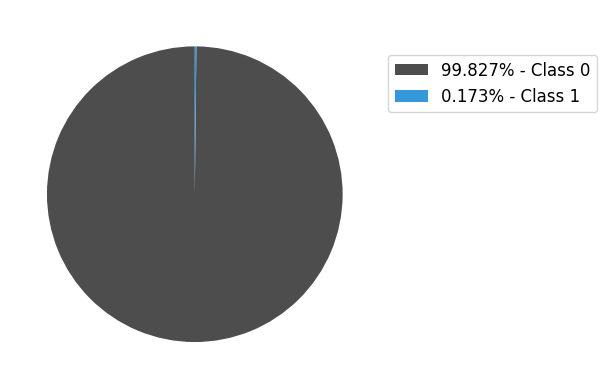

In [13]:
# Get the class distribution
counts = df['Class'].value_counts()

# Create the pie chart
fig, ax = plt.subplots()
colors = ['#4D4D4D', '#3498DB']
ax.pie(counts, colors=colors, startangle=90,
       textprops={'color': 'black', 'fontsize': 14})

# Add percentage and class labels outside the circle
labels = [f'{counts[i]/sum(counts)*100:.3f}% - Class {i}' for i in counts.index]
ax.legend(labels, loc='upper left', bbox_to_anchor=(1.0, 0.9), fontsize=12)
plt.show()


Displaying count, mean, std, min, 25%- Quantil, 50%-QUantil (Median), 75%-Quantil, max values.

First insights can be gained:

As it is stated in the data description, the "Time" variable stores the seconds ealpsed between the obseervation under consideration and the first transaction in the dataset.

The dataset contains transactions of two almowst two days (The max. value is 172,792. Two days expressed in seconds 172,800).

The "Amount" variable has a mean of 88.35 and median of 22.00. This indicates that the amount variable is right-skewed, since the mean is bigger than the mean. 


In [14]:
round(df.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,...,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,...,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,...,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,...,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


Now checking the summary statistics per class

In [25]:
df_genuine = df[df['Class']==0]
df_fraudulent = df[df['Class']==1]

In [26]:
round(df_genuine.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,...,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.00,284315.0
mean,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,...,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29,0.0
std,47484.02,1.93,1.64,1.46,1.40,1.36,1.33,1.18,1.16,1.09,...,0.72,0.72,0.62,0.61,0.52,0.48,0.40,0.33,250.11,0.0
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-31.76,-73.22,-6.29,...,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.0
25%,54230.00,-0.92,-0.60,-0.88,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,...,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.65,0.0
50%,84711.00,0.02,0.06,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,...,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.0
75%,139333.00,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,...,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.05,0.0
max,172792.00,2.45,18.90,9.38,16.88,34.80,73.30,120.59,18.71,15.59,...,22.61,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,0.0


In [27]:
round(df_fraudulent.describe(),2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,...,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.00,492.0
mean,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,...,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21,1.0
std,47835.37,6.78,4.29,7.11,2.87,5.37,1.86,7.21,6.80,2.50,...,3.87,1.49,1.58,0.52,0.80,0.47,1.38,0.55,256.68,0.0
min,406.00,-30.55,-8.40,-31.10,-1.31,-22.11,-6.41,-43.56,-41.04,-13.43,...,-22.80,-8.89,-19.25,-2.03,-4.78,-1.15,-7.26,-1.87,0.00,1.0
25%,41241.50,-6.04,1.19,-8.64,2.37,-4.79,-2.50,-7.97,-0.20,-3.87,...,0.04,-0.53,-0.34,-0.44,-0.31,-0.26,-0.02,-0.11,1.00,1.0
50%,75568.50,-2.34,2.72,-5.08,4.18,-1.52,-1.42,-3.03,0.62,-2.21,...,0.59,0.05,-0.07,-0.06,0.09,0.00,0.39,0.15,9.25,1.0
75%,128483.00,-0.42,4.97,-2.28,6.35,0.21,-0.41,-0.95,1.76,-0.79,...,1.24,0.62,0.31,0.29,0.46,0.40,0.83,0.38,105.89,1.0
max,170348.00,2.13,22.06,2.25,12.11,11.10,6.47,5.80,20.01,3.35,...,27.20,8.36,5.47,1.09,2.21,2.75,3.05,1.78,2125.87,1.0


What is strange is that there are transaction with the amount value of 0.

Let's investigate this

In [29]:
print(df_genuine[df_genuine['Amount']==0].shape)
print(df_fraudulent[df_fraudulent['Amount']==0].shape)

(1798, 31)
(27, 31)


There are 1798 genuine and 27 fraudulent transaction with a Amount == 0.00

Let's check the summary statistics for each class without the transaction with an AMount == 0.00


In [30]:
df_genuine_bigger_0 = df[(df['Class']==0) & (df['Amount']>0)]
df_fraudulent_bigger_0 = df[(df['Class']==1) & (df['Amount']>0)]

In [31]:
df_genuine_bigger_0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,...,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.000000,282517.0
mean,94874.028193,0.007665,-0.008023,0.008391,-0.019399,0.003176,0.000974,0.011758,-0.000984,0.005634,...,-0.001310,-0.001639,0.000220,0.000373,-0.000571,-0.001436,-0.000021,0.000073,88.852926,0.0
std,47478.022359,1.928652,1.635998,1.458882,1.389084,1.356070,1.329384,1.178479,1.160221,1.090462,...,0.715853,0.723687,0.620166,0.605910,0.520395,0.481940,0.399344,0.329846,250.800179,0.0
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-31.764946,-73.216718,-6.290730,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.010000,0.0
25%,54273.000000,-0.917407,-0.603440,-0.888033,-0.854541,-0.691651,-0.767628,-0.549697,-0.208938,-0.640346,...,-0.229072,-0.544012,-0.161543,-0.354551,-0.317641,-0.327999,-0.070802,-0.052880,5.990000,0.0
50%,84727.000000,0.018855,0.061370,0.179659,-0.028900,-0.054455,-0.275743,0.042946,0.021188,-0.049254,...,-0.030373,0.004833,-0.011029,0.041079,0.015511,-0.054419,0.001230,0.011277,22.490000,0.0
75%,139373.000000,1.315983,0.800344,1.024089,0.726999,0.610770,0.394915,0.572623,0.325578,0.599946,...,0.185522,0.526732,0.147887,0.440258,0.350224,0.239355,0.090926,0.078172,78.000000,0.0
max,172792.000000,2.454930,18.902453,9.382558,16.875344,34.801666,73.301626,120.589494,18.709255,15.594995,...,22.614889,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,0.0


In [32]:
df_fraudulent_bigger_0.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,...,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.000000,465.0
mean,79620.589247,-4.869327,3.647041,-7.102202,4.491414,-3.293201,-1.385325,-5.616769,0.614583,-2.531900,...,0.766353,0.016797,-0.043881,-0.104358,0.037777,0.041494,0.167023,0.072914,129.307462,1.0
std,47782.967364,6.819839,4.285264,7.202713,2.905285,5.376655,1.852307,7.161898,6.734723,2.496280,...,3.842197,1.481098,1.598982,0.521401,0.803084,0.473501,1.383413,0.554196,262.298781,0.0
min,472.000000,-30.552380,-7.449015,-31.103685,-1.313275,-22.105532,-6.406267,-43.557242,-41.044261,-13.320155,...,-22.797604,-8.887017,-19.254328,-2.028024,-4.781606,-1.152671,-7.263482,-1.869290,0.010000,1.0
25%,41204.000000,-6.159607,1.176270,-8.858204,2.286869,-4.801176,-2.513479,-8.427378,-0.233403,-3.845567,...,0.015255,-0.516242,-0.343058,-0.438908,-0.325033,-0.264325,-0.026219,-0.104285,1.000000,1.0
50%,72327.000000,-2.405580,2.660670,-5.047679,4.083047,-1.614608,-1.357746,-3.059245,0.591828,-2.064945,...,0.603127,0.092073,-0.072173,-0.061263,0.068951,-0.007772,0.390809,0.144774,17.060000,1.0
75%,125200.000000,-0.440095,5.125759,-2.276921,6.370895,0.130531,-0.400859,-0.954940,1.778492,-0.749277,...,1.325218,0.652932,0.335821,0.292539,0.465058,0.400348,0.830062,0.380246,111.700000,1.0
max,170348.000000,2.132386,22.057729,2.250210,12.114672,11.095089,6.474115,5.802537,20.007208,3.353525,...,27.202839,8.316275,5.466230,1.091435,2.208209,2.745261,3.052358,1.779364,2125.870000,1.0


Since no further information on the dataset is given, no concrete explanation can be given for these cases. One assumption could be that the card was deposited as security. This is sometimes due to initially using free (online) services. However, since there is no confirmed suspicion of an error, the entire dataset will continue to be used in the work. Attention is paid to changes in fraud cases. Here the average value has increased from 122.21€ to 129.31€. As work continues with the full data et, the cost of FN will be estimated using the average value of all fraud cases (122.21€).

Checking for null values. Luckily this dataset does not contai any null values, hencee there is no need to talk about possible ways of tackling null value problems

In [33]:
df.isnull().sum().max()

0

Next let's check the relationship and distribution of all features

First, a correlation matrix is created to examine the relationship between the variables. No strong correlations can be identified. The strongest correlation of -0.53 is between the variables Amount and V2. The remaining correlations lie between the value just mentioned of -0.53 as the lower limit and 0.4 as the upper limit.

<Axes: >

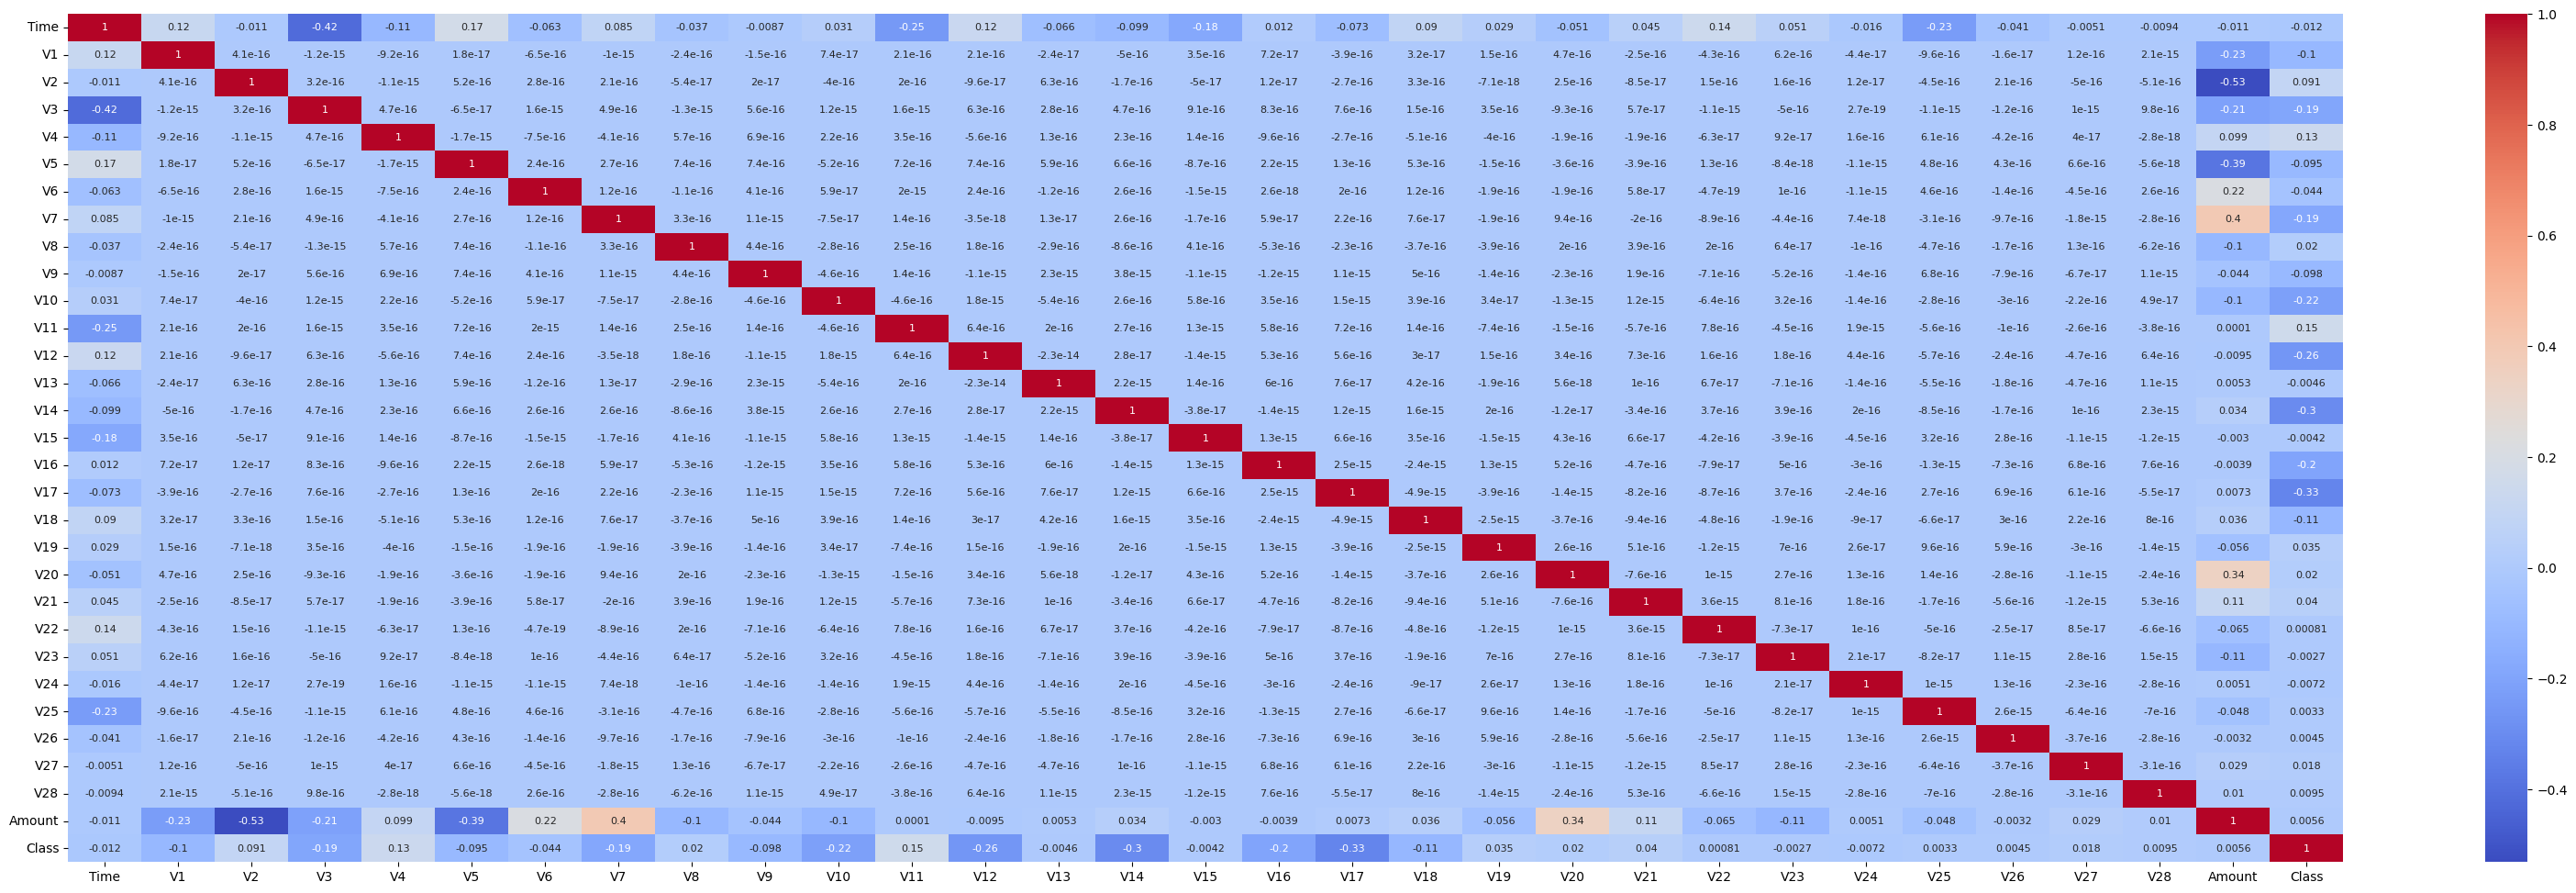

In [34]:
plt.figure(figsize=(40,12))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm',annot= True, annot_kws={'size':8})

Following, the distribution of each feature is examined. For this purpose, a histogram is created for all features except Class. Here, too, the interpretability of the variables V1 to V28 is difficult. However, the times of day can be recognized by the distribution of the variable ’Time’. The two visible drops indicate the nightly activity of the credit card users. The knowledge already mentioned from the variable ‘Amount’ is also visible here. The majority of the transactions are of low value and the individual very high transactions result in the right skewed distribution. 

In [37]:
column_names = df.columns[:-1]
column_names

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

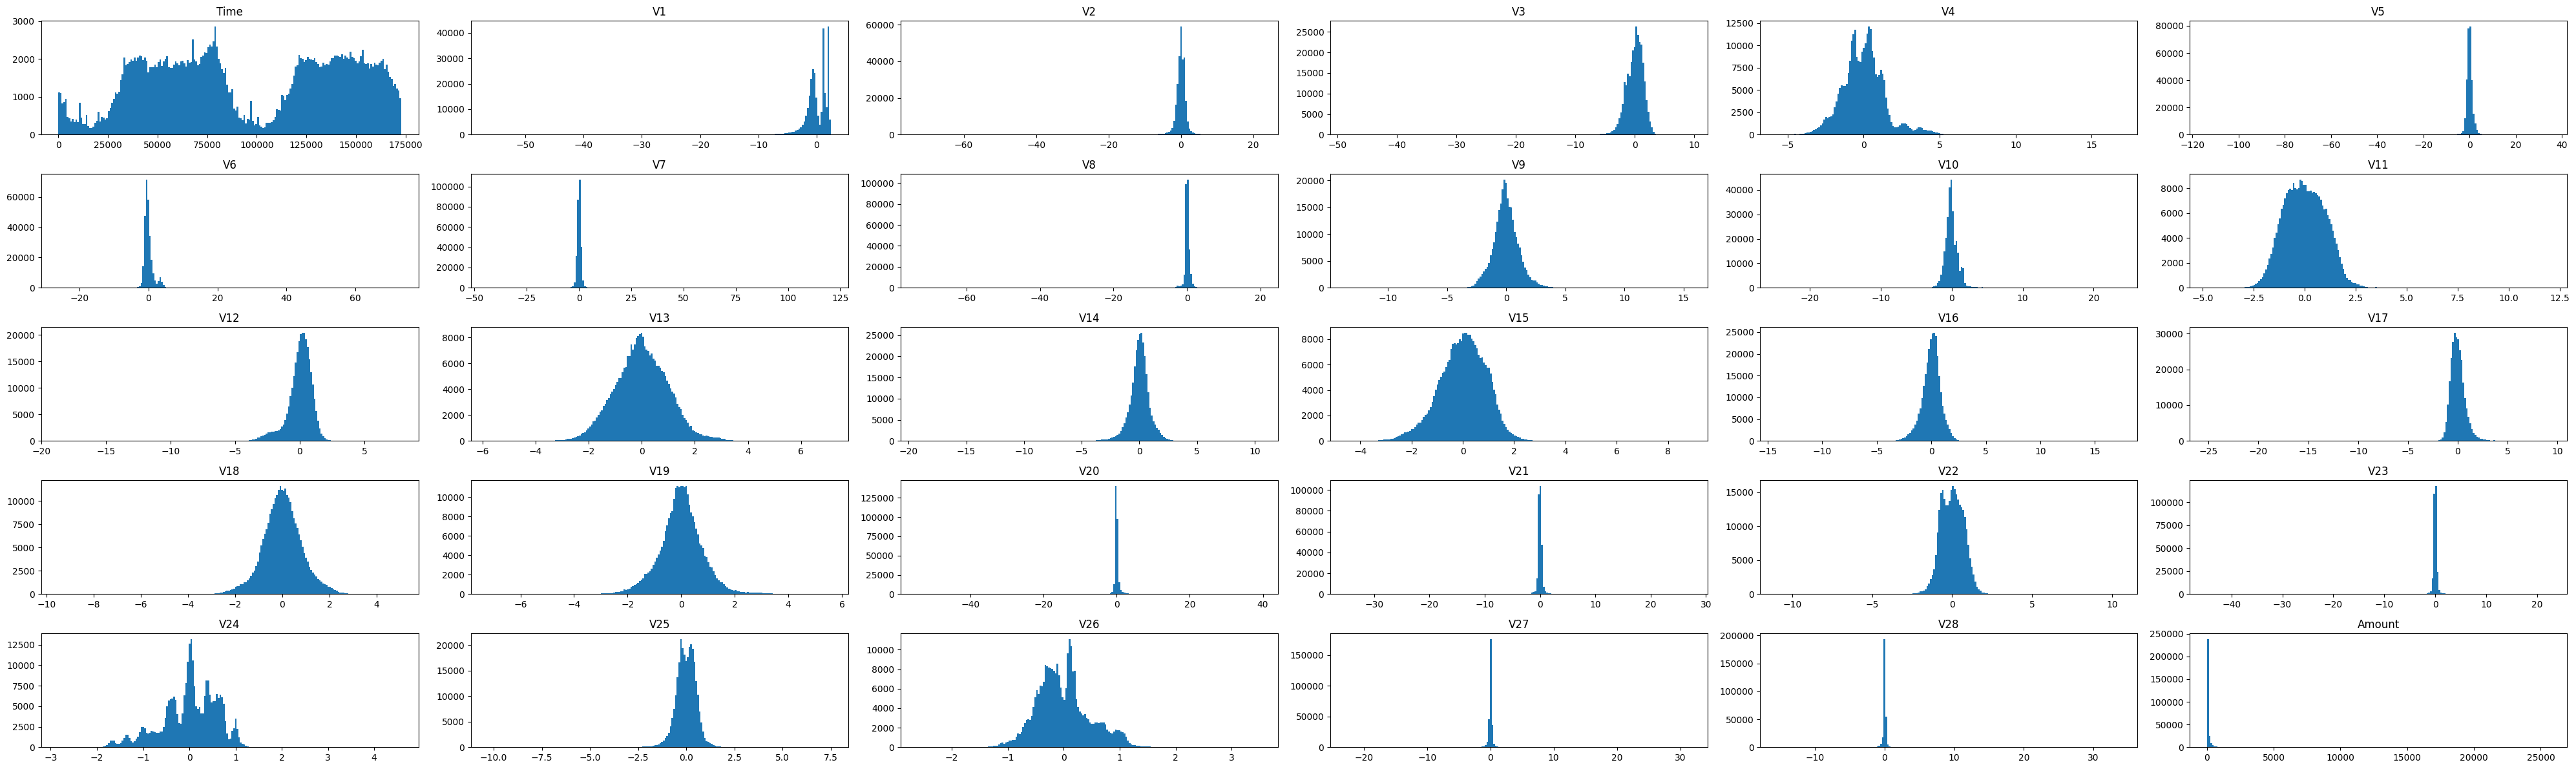

In [38]:
plt.figure(figsize=(40,12))

for x in (np.arange(30)+1):

    plt.subplot(5,6,x)
    plt.hist(df[column_names[x-1]], bins = 200)
    plt.title(column_names[x-1])

plt.tight_layout()

The following observation of the KDE plot is even more revealing. As already explained in the methodology chapter, the distribution per class is taken into account here with the help of the calculation of the probability density. This view is interesting in that it is relatively easy to see which features have a similar distribution for both classes and which do not. From this, initial assumptions can be derived as to which features are likely to play a greater role in predicting credit card fraud. In this case, one would expect that features V3, V4, V9, V10, V11, V12, V14, V16, V17 and V18 are likely to have the greatest impact.

C:\Users\wh\AppData\Local\Temp\ipykernel_932\2220326936.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t0[column_names[x-1]], bw=0.5,label="Class = 0")
C:\Users\wh\AppData\Local\Temp\ipykernel_932\2220326936.py:11: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(t1[column_names[x-1]], bw=0.5,label="Class = 1")
C:\Users\wh\AppData\Local\Temp\ipykernel_932\2220326936.py:10: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13

<Figure size 640x480 with 0 Axes>

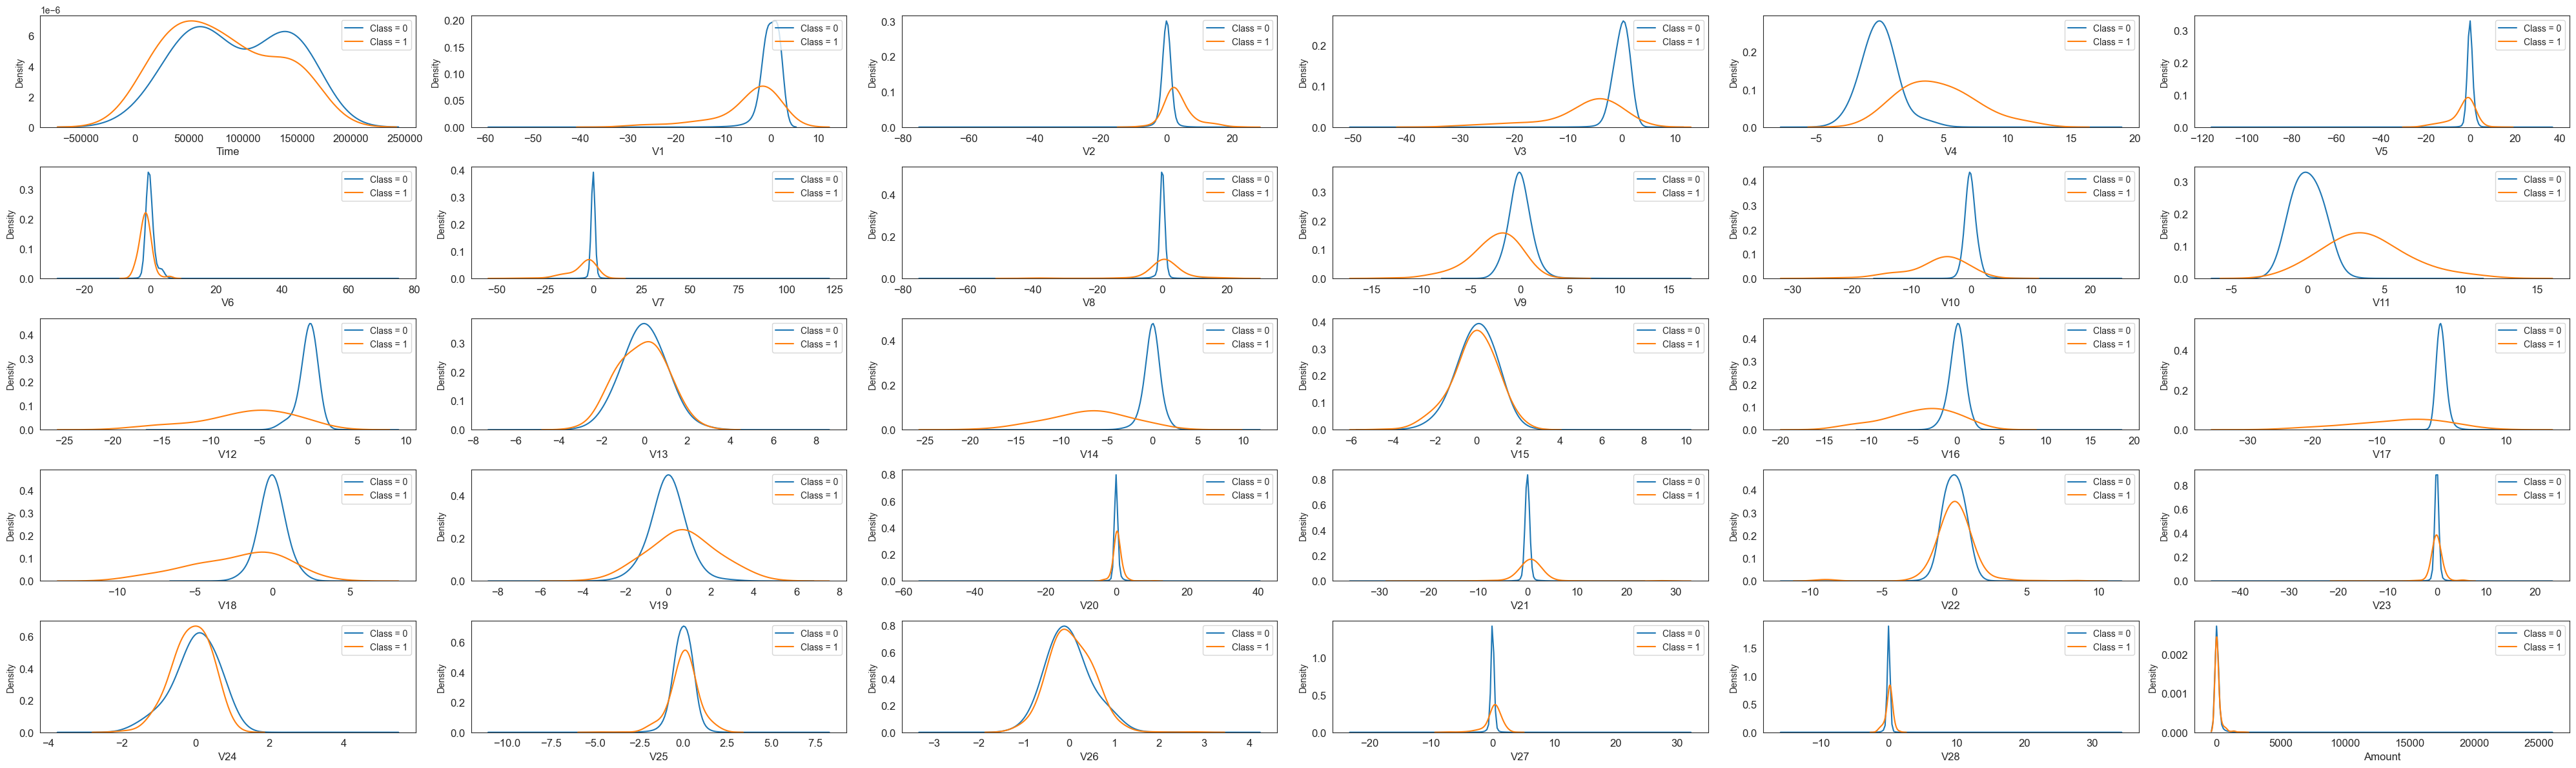

In [39]:
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('white')
plt.figure()
fig, ax = plt.subplots(5,6,figsize=(40,12))

for x in (np.arange(30)+1):
    plt.subplot(5,6,x)
    sns.kdeplot(t0[column_names[x-1]], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[column_names[x-1]], bw=0.5,label="Class = 1")
    plt.xlabel(column_names[x-1], fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.legend(loc = 'upper right')

plt.tight_layout()

A subsequently created boxplot clarifies the assumptions. The box plot shows the proportion of transactions (minimum, 25%, 50%, 75% percentile, maximum and outlier) that are below a certain value in the variable under consideration. Again, the boxplot was divided into classes. Dividing the boxplots by class confirms the facts presented in the KDE plot, namely which variables are likely to be more important in predicting credit card fraud.

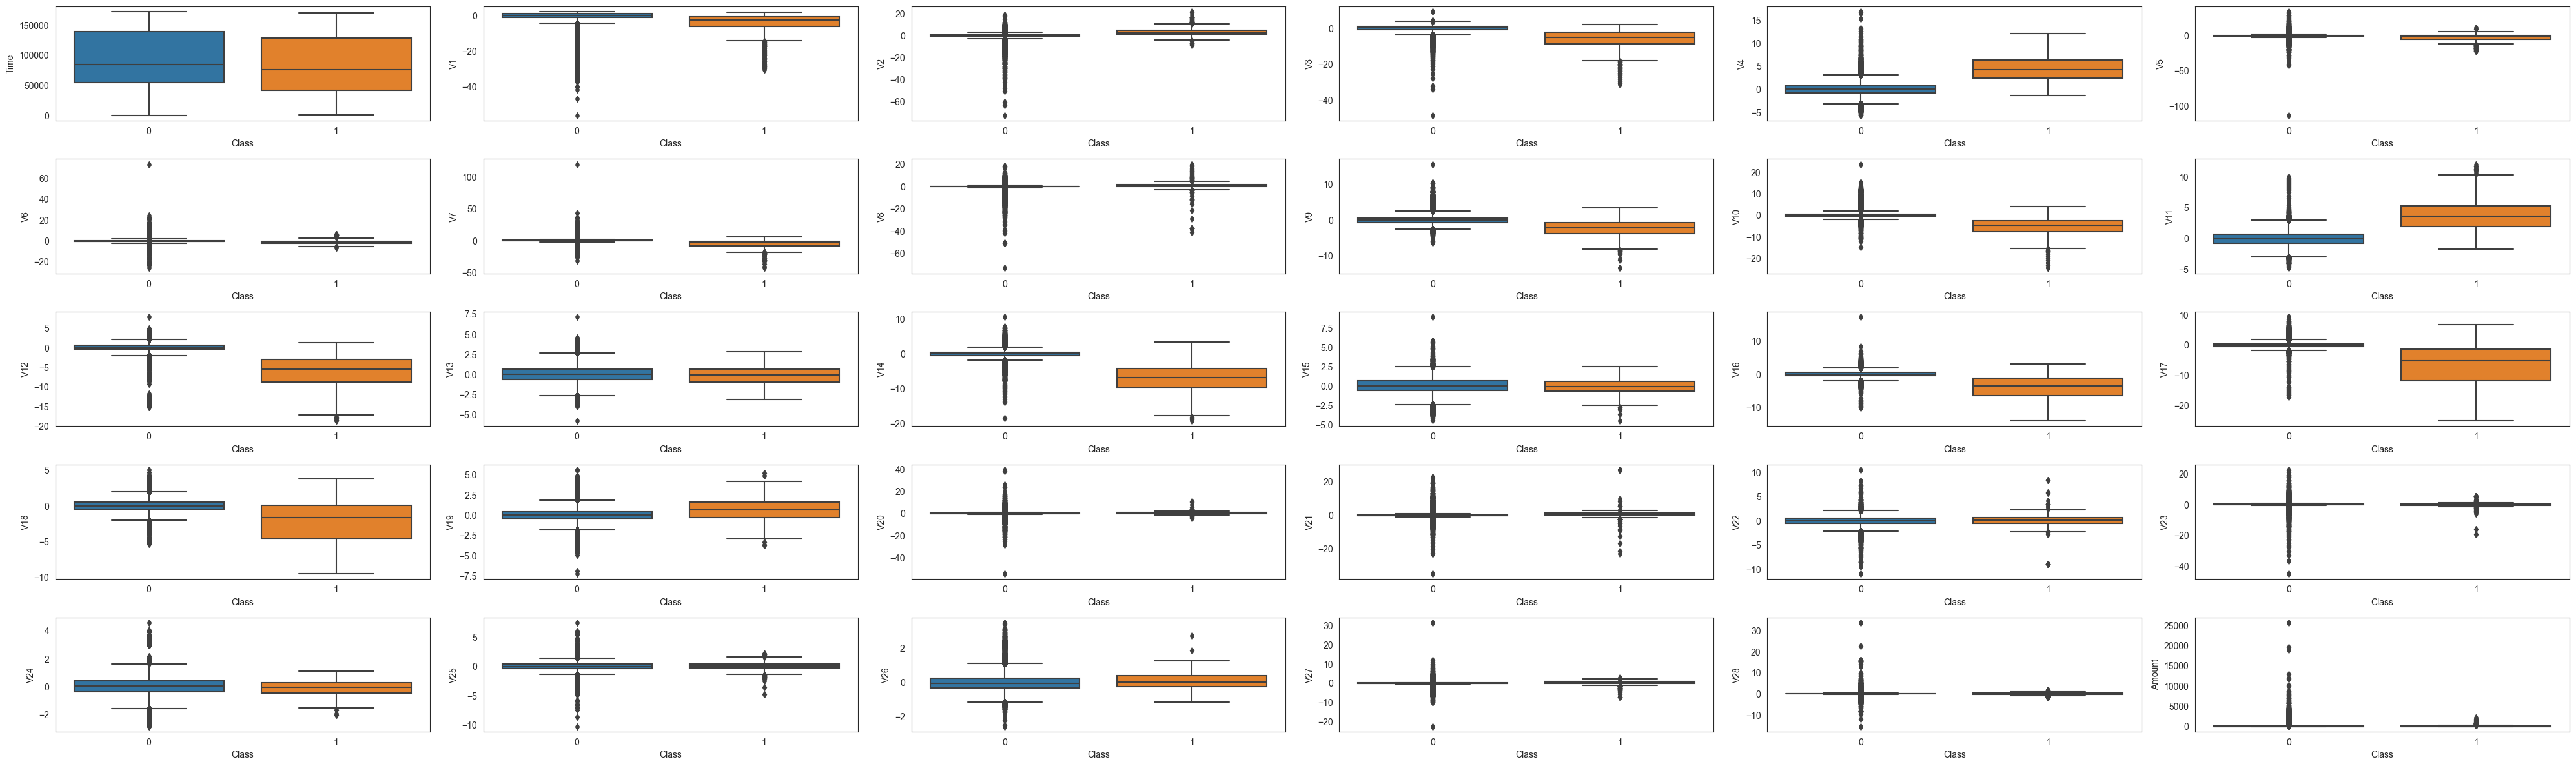

In [40]:
plt.figure(figsize=(40,12))



for x in (np.arange(30)+1):

    plt.subplot(5,6,x)

    sns.boxplot(x='Class', y=column_names[x-1], data=df)
    #plt.boxplot(df[column_names[x-1]])
    #plt.title(column_names[x-1])

plt.tight_layout()

Finally a dimensionality reduction will be performed to try to visualize the data in a 3d plot. This should help to notice that fraudulent transactions are seperable from genuine one, so that a pattern can be found by the models.

In [42]:
from sklearn.preprocessing import StandardScaler
#from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from mpl_toolkits.mplot3d import Axes3D

In [44]:
df_no_class = df.drop('Class', axis = 1)
df_only_class = df['Class']

Scaling the data to mean = 0 and std. dev of 1 in order to apply PCA in further step to visualise the data on a 3d plot. 

In [45]:
scaler = StandardScaler()
df_no_class_scaled = pd.DataFrame(scaler.fit_transform(df_no_class), columns = df_no_class.columns)

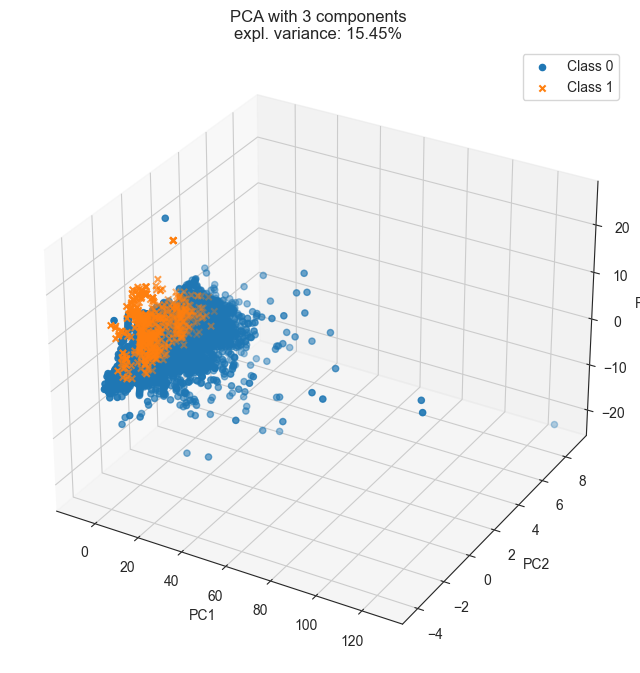

In [48]:
pca_3d = PCA(n_components = 3, random_state = 1)
pca_df_3d = pca_3d.fit_transform(df_no_class_scaled)
variance_3d = round(sum(pca_3d.explained_variance_ratio_) * 100, 2)
pca_df_3d = pd.DataFrame(pca_df_3d, columns = ['PC1', 'PC2', 'PC3'])
pca_df_3d['Class'] = df_only_class.values


fig = plt.figure(figsize = (20, 8))
ax1 = fig.add_subplot(111, projection = '3d')
f = pca_df_3d[pca_df_3d['Class'] == 1]
nf = pca_df_3d[pca_df_3d['Class'] == 0]
ax1.scatter(nf['PC1'], nf['PC2'], nf['PC3'],marker = 'o')
ax1.scatter(f['PC1'], f['PC2'], f['PC3'], marker = 'x')
ax1.view_init(30, 300)
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.set_zlabel('PC3')
plt.title(f'PCA with 3 components\nexpl. variance: {variance_3d}%')
plt.legend(['Class 0', 'Class 1'])
plt.show()

We can even do a interactive plot 

In [51]:
import plotly.express as px


scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=3)
pca.fit(data_scaled)
scores = pca.transform(data_scaled)

# Create 3D plot
fig = px.scatter_3d(
    scores, x=0, y=1, z=2, 
    opacity=0.5, color=df['Class'],
    size_max = 1,
)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed